In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ratings = pd.read_csv('ratings.csv', header=None)
ratings = ratings.pivot(index=0, columns=1, values=2)
ratings.columns = np.arange(ratings.shape[1])
ratings.index = np.arange(ratings.shape[0])

W = ratings.copy()
W[pd.notnull(W)] = 1
W[pd.isnull(W)] = 0

W = W.values
R = ratings.fillna(0).values

In [3]:
lambda_ = 0.1
n_factors = 3
m, n = R.shape
n_iterations = 100

X = 5 * np.random.rand(m, n_factors) 
Y = 5 * np.random.rand(n_factors, n)

In [4]:
errors = []
for i in range(n_iterations):
    X = np.linalg.solve(np.dot(Y, Y.T) + lambda_ * np.eye(n_factors), np.dot(Y, R.T)).T
    Y = np.linalg.solve(np.dot(X.T, X) + lambda_ * np.eye(n_factors), np.dot(X.T, R))
    
    R_est = np.dot(X, Y)
    error = np.sum((W*(R - R_est)) ** 2)
    errors.append(error)
    
    print('Iteration: {}, Error: {}'.format(i, error))

Iteration: 0, Error: 6528451.671767578
Iteration: 1, Error: 5615594.302672017
Iteration: 2, Error: 5483793.724825169
Iteration: 3, Error: 5443174.8097390095
Iteration: 4, Error: 5430055.526984123
Iteration: 5, Error: 5424491.301592875
Iteration: 6, Error: 5421130.723090361
Iteration: 7, Error: 5418522.098432356
Iteration: 8, Error: 5416236.67049545
Iteration: 9, Error: 5414138.346003991
Iteration: 10, Error: 5412180.503075388
Iteration: 11, Error: 5410344.374972228
Iteration: 12, Error: 5408619.597882648
Iteration: 13, Error: 5406998.16588049
Iteration: 14, Error: 5405472.727349412
Iteration: 15, Error: 5404036.235490541
Iteration: 16, Error: 5402681.966773152
Iteration: 17, Error: 5401403.598195294
Iteration: 18, Error: 5400195.260971751
Iteration: 19, Error: 5399051.559719953
Iteration: 20, Error: 5397967.565064366
Iteration: 21, Error: 5396938.7897786815
Iteration: 22, Error: 5395961.156406311
Iteration: 23, Error: 5395030.961650791
Iteration: 24, Error: 5394144.840737376
Iteration:

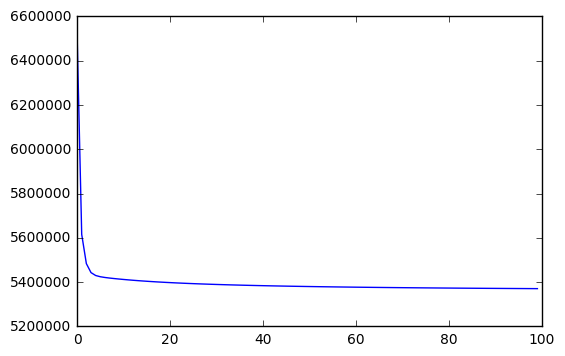

In [5]:
plt.plot(errors)